In [5]:
import scanpy as sc
import anndata

In [2]:
adata_train_path= "/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_train.h5ad"
adata_test_path= "/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_test.h5ad"
adata_ood_path= "/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_ood.h5ad"

In [4]:
adata_train = sc.read(adata_train_path)
adata_test = sc.read(adata_test_path)
adata_ood = sc.read(adata_ood_path)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [7]:
adata = anndata.concat((adata_train, adata_test, adata_ood))

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
adata

AnnData object with n_obs × n_vars = 63878 × 2000
    obs: 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'condition', 'pathway1', 'pathway2', 'split', 'control', 'cell_type', 'perturbation', 'cell_line', 'smiles_drug_1', 'smiles_drug_2'
    obsm: 'X_pca', 'X_umap', 'ecfp_drug_1', 'ecfp_drug_2'
    layers: 'counts'

In [9]:
sc.pp.neighbors(adata)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
sc.tl.umap(adata)

In [24]:
ood_conditions = ["Panobinostat+PCI-34051", "Dacinostat+Danusertib", "Givinostat+SRT1720", "Panobinostat+Curcumin", "SRT2104+Alvespimycin", "control"]

In [25]:
adata.obs["ood"] = adata.obs.apply(lambda x: x["condition"] if x["condition"] in ood_conditions else None, axis=1).astype("category")

In [27]:
adata.obs["split"]

Cell
A01_A02_RT_BC_10_Lig_BC_18    train
A01_A02_RT_BC_10_Lig_BC_25    train
A01_A02_RT_BC_10_Lig_BC_48    train
A01_A02_RT_BC_10_Lig_BC_51    train
A01_A02_RT_BC_10_Lig_BC_72    train
                              ...  
H12_A02_RT_BC_59_Lig_BC_54     test
H12_A02_RT_BC_60_Lig_BC_12     test
H12_A02_RT_BC_60_Lig_BC_38     test
H12_A02_RT_BC_60_Lig_BC_47     test
H12_A02_RT_BC_60_Lig_BC_51     test
Name: split, Length: 63878, dtype: category
Categories (3, object): ['ood', 'test', 'train']

In [28]:
def get_control_split(x):
    if x["perturbation"] == "control":
        if x["split"] == "test":
            return "c_test"
        if x["split"] == "train":
            return "c_train"
    return None

    
adata.obs["control_split"] = adata.obs.apply(get_control_split, axis=1)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


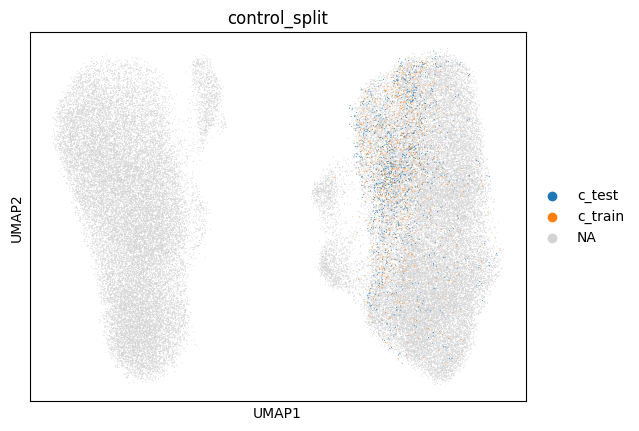

In [29]:
sc.pl.umap(adata, color="control_split")

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


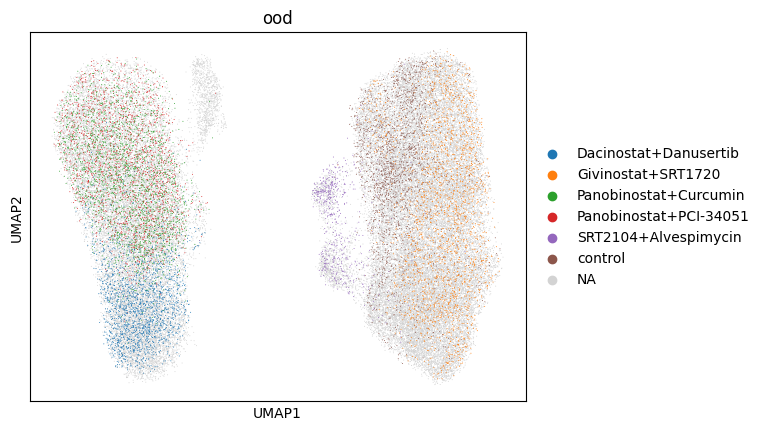

In [26]:

sc.pl.umap(adata, color="ood")

In [77]:
import pandas as pd
import os
out_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/out"
res_train = pd.read_csv(os.path.join(out_dir, "train_metrics_new.csv"))
res_test = pd.read_csv(os.path.join(out_dir, "test_metrics_new.csv"))
res_ood = pd.read_csv(os.path.join(out_dir, "ood_metrics_new.csv"))
                                                

In [78]:
res_train

,Unnamed: 0,Alvespimycin+Pirarubicin,Cediranib+PCI-34051,Dacinostat+Dasatinib,Dacinostat+PCI-34051,Givinostat+Carmofur,Givinostat+Cediranib,Givinostat+Crizotinib,Givinostat+Curcumin,Givinostat+Dasatinib,...,Panobinostat+SRT2104,Panobinostat+SRT3025,Panobinostat+Sorafenib,SRT3025+Cediranib,control+Alvespimycin,control+Dacinostat,control+Dasatinib,control+Givinostat,control+Panobinostat,control+SRT2104
0,r_squared,0.987950,0.988473,0.990467,0.991891,0.990402,0.973450,0.983763,0.991616,0.966523,...,0.996379,0.996400,0.997324,0.997561,0.987676,0.917729,0.962300,0.976633,0.990632,0.993464
1,sinkhorn_div_01,12.983164,11.550300,12.638732,12.098889,12.192866,12.386548,12.398717,12.178135,12.637096,...,13.001782,13.010839,12.872692,11.792439,11.677452,12.929800,12.709825,12.431434,13.357416,11.886272
2,e_distance,0.036697,0.021792,0.029422,0.026985,0.014852,0.033937,0.022450,0.013058,0.037791,...,0.047892,0.048148,0.044295,0.004106,0.046866,0.147873,0.061125,0.023727,0.074336,0.011912
3,mmd,0.245033,0.166634,0.097382,0.181465,-0.022179,0.315460,0.118088,0.029846,0.210220,...,0.089708,0.177856,0.152304,0.074402,0.219677,0.669090,0.292427,0.161606,0.167995,0.062946


In [79]:
res_test

,Unnamed: 0,Alvespimycin+Pirarubicin,Cediranib+PCI-34051,Dacinostat+Dasatinib,Dacinostat+PCI-34051,Givinostat+Carmofur,Givinostat+Cediranib,Givinostat+Crizotinib,Givinostat+Curcumin,Givinostat+Dasatinib,...,Panobinostat+SRT2104,Panobinostat+SRT3025,Panobinostat+Sorafenib,SRT3025+Cediranib,control+Alvespimycin,control+Dacinostat,control+Dasatinib,control+Givinostat,control+Panobinostat,control+SRT2104
0,r_squared,0.964908,0.975724,0.970038,0.973105,0.954769,0.948083,0.931471,0.949572,0.912366,...,0.986115,0.987706,0.993887,0.980465,0.986516,0.914606,0.927772,0.962931,0.980860,0.982602
1,sinkhorn_div_01,14.849083,14.812091,15.532183,15.463278,15.216486,15.874716,15.689240,15.459118,16.039516,...,15.161573,15.352080,16.083635,15.446687,14.226886,15.499622,16.125523,15.434444,17.604271,15.099158
2,e_distance,0.091259,0.016588,0.042532,0.039570,0.024600,0.028210,0.035231,0.022280,0.061118,...,0.051501,0.051652,0.023427,0.001984,0.036712,0.129264,0.081521,0.004874,0.085723,-0.004820
3,mmd,0.590942,0.379795,0.389027,0.340069,0.294041,0.328495,0.406750,0.317745,0.502567,...,0.300014,0.367664,0.181934,0.298496,0.246277,0.782476,0.589539,0.245308,0.503586,0.201809


In [80]:
res_ood

,Unnamed: 0,Alvespimycin+Pirarubicin,Cediranib+PCI-34051,Dacinostat+Dasatinib,Dacinostat+PCI-34051,Givinostat+Carmofur,Givinostat+Cediranib,Givinostat+Crizotinib,Givinostat+Curcumin,Givinostat+Dasatinib,...,Panobinostat+SRT2104,Panobinostat+SRT3025,Panobinostat+Sorafenib,SRT3025+Cediranib,control+Alvespimycin,control+Dacinostat,control+Dasatinib,control+Givinostat,control+Panobinostat,control+SRT2104
0,r_squared,0.987950,0.988473,0.990467,0.991891,0.990402,0.973450,0.983763,0.991616,0.966523,...,0.996379,0.996400,0.997324,0.997561,0.987676,0.917729,0.962300,0.976633,0.990632,0.993464
1,sinkhorn_div_01,12.983164,11.550300,12.638732,12.098889,12.192866,12.386548,12.398717,12.178135,12.637096,...,13.001782,13.010839,12.872692,11.792439,11.677452,12.929800,12.709825,12.431434,13.357416,11.886272
2,e_distance,0.036697,0.021792,0.029422,0.026985,0.014852,0.033937,0.022450,0.013058,0.037791,...,0.047892,0.048148,0.044295,0.004106,0.046866,0.147873,0.061125,0.023727,0.074336,0.011912
3,mmd,0.245033,0.166634,0.097382,0.181465,-0.022179,0.315460,0.118088,0.029846,0.210220,...,0.089708,0.177856,0.152304,0.074402,0.219677,0.669090,0.292427,0.161606,0.167995,0.062946


In [83]:
r_test = res_test.set_index("Unnamed: 0").T

In [84]:
r_test

Unnamed: 0,r_squared,sinkhorn_div_01,e_distance,mmd
Alvespimycin+Pirarubicin,0.964908,14.849083,0.091259,0.590942
Cediranib+PCI-34051,0.975724,14.812091,0.016588,0.379795
Dacinostat+Dasatinib,0.970038,15.532183,0.042532,0.389027
Dacinostat+PCI-34051,0.973105,15.463278,0.039570,0.340069
Givinostat+Carmofur,0.954769,15.216486,0.024600,0.294041
Givinostat+Cediranib,0.948083,15.874716,0.028210,0.328495
Givinostat+Crizotinib,0.931471,15.689240,0.035231,0.406750
Givinostat+Curcumin,0.949572,15.459118,0.022280,0.317745
Givinostat+Dasatinib,0.912366,16.039516,0.061118,0.502567
Givinostat+SRT2104,0.970205,15.311034,-0.002390,0.181644


In [86]:
r_ood = res_ood.set_index("Unnamed: 0").T

In [87]:
r_ood

Unnamed: 0,r_squared,sinkhorn_div_01,e_distance,mmd
Alvespimycin+Pirarubicin,0.987950,12.983164,0.036697,0.245033
Cediranib+PCI-34051,0.988473,11.550300,0.021792,0.166634
Dacinostat+Dasatinib,0.990467,12.638732,0.029422,0.097382
Dacinostat+PCI-34051,0.991891,12.098889,0.026985,0.181465
Givinostat+Carmofur,0.990402,12.192866,0.014852,-0.022179
Givinostat+Cediranib,0.973450,12.386548,0.033937,0.315460
Givinostat+Crizotinib,0.983763,12.398717,0.022450,0.118088
Givinostat+Curcumin,0.991616,12.178135,0.013058,0.029846
Givinostat+Dasatinib,0.966523,12.637096,0.037791,0.210220
Givinostat+SRT2104,0.988250,12.182379,0.015366,0.119316


In [38]:
res_test = res_test.drop("Unnamed: 0", axis=1)

In [41]:
res_test = res_test.T

In [42]:
res_test


,0,1,2,3
Alvespimycin+Pirarubicin,0.749082,22.990147,1.522541,8.786726
Cediranib+PCI-34051,0.972693,14.922293,0.032301,0.430542
Dacinostat+Dasatinib,0.712576,24.923916,1.750603,10.246788
Dacinostat+PCI-34051,0.776474,22.483465,1.377831,7.876476
Givinostat+Carmofur,0.853037,16.097948,0.170682,1.223148
Givinostat+Cediranib,0.821739,16.910709,0.202444,1.388729
Givinostat+Crizotinib,0.781106,17.052647,0.253124,1.794998
Givinostat+Curcumin,0.736455,17.242807,0.316607,2.152042
Givinostat+Dasatinib,0.689031,18.003880,0.382132,2.558727
Givinostat+SRT2104,0.730515,17.261507,0.319201,2.151875


In [45]:
res_test[0].mean()

0.22683783854680536

In [64]:
adata.obs["Drug1"].value_counts()

Drug1
Givinostat      21951
Panobinostat    16349
control         12937
Dacinostat       6468
SRT3025          3016
Cediranib        2161
SRT2104           520
Alvespimycin      476
Name: count, dtype: int64

In [67]:
[adata.obs["Drug1"]=="Panobinostat"]

AttributeError: 'list' object has no attribute 'values'

In [48]:
adata.obs["tmp"] = adata.obs.apply(lambda x: x["perturbation"] if x["perturbation"]=="control+Panobinostat" else None, axis=1)

In [59]:
(adata.obs["Drug1"]=="Panobinostat").sum()

16349

In [68]:
adata.obs["pan"] = adata.obs.apply(lambda x: x["perturbation"] if x["Drug1"]=="Panobinostat" else None, axis=1)

In [69]:
adata.obs["pan"].value_counts()

pan
Panobinostat+Curcumin        2244
Panobinostat+Sorafenib       2013
Panobinostat+SRT2104         1971
Panobinostat+Dasatinib       1955
Panobinostat+SRT3025         1889
Panobinostat+SRT1720         1826
Panobinostat+PCI-34051       1814
Panobinostat+Crizotinib      1641
Panobinostat+Alvespimycin     996
Name: count, dtype: int64

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid s

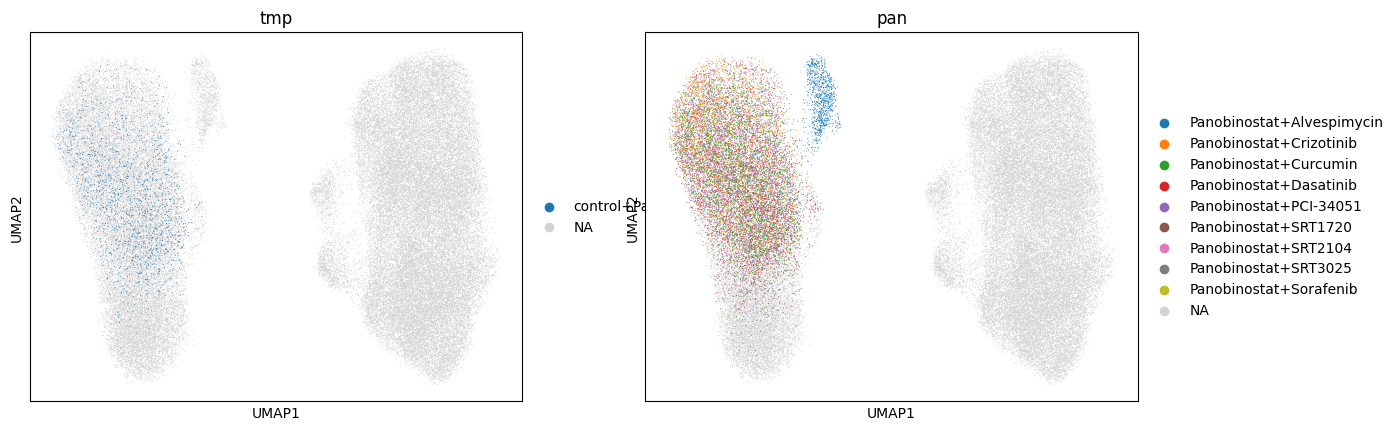

In [70]:
sc.pl.umap(adata, color=["tmp", "pan"])

In [ ]:
sc.pl.umap(adata, color=)

In [40]:
import seaborn as sns

In [ ]:
sns.barplot(res_test, )

In [ ]:
del res_test 

In [74]:
import numpy as np
q_1 = [0,1,2, 2]
q_2 = [1,2,3, 3]
q_3 = [2, 3,4, 4]

k_1 = [10, 30, 2, 4]
k_2 = [3, 24, 5, 2]
k_3 = [42, 42, 12, 3]


v_1 = [0,1,2, 55]
v_2 = [1,2,3, 5]
v_3 = [2, 33, 14 , 5]

Q = np.array([q_1, q_2, q_3])
K = np.array([k_1, k_2, k_3])
V = np.array([v_1, v_2, v_3])

Q = np.array([q_1, q_2, q_3])
K = np.array([k_1, k_2, k_3])
V = np.array([v_1, v_2, v_3])

A = np.matmul(Q, np.transpose(K))

np.matmul(A, V)

array([[ 182, 2494, 1206, 2860],
       [ 414, 5875, 2786, 6055],
       [ 646, 9256, 4366, 9250]])

In [75]:
Q.shape, K.shape, V.shape

((3, 4), (3, 4), (3, 4))

In [76]:
import numpy as np
q_1 = [0,1,2, 2]
q_3 = [1,2,3, 3]
q_2 = [2, 3,4, 4]

k_1 = [10, 30, 2, 4]
k_3 = [3, 24, 5, 2]
k_2 = [42, 42, 12, 3]


v_1 = [0,1,2, 55]
v_3 = [1,2,3, 5]
v_2 = [2, 33, 14 , 5]

Q = np.array([q_1, q_2, q_3])
K = np.array([k_1, k_2, k_3])
V = np.array([v_1, v_2, v_3])

Q = np.array([q_1, q_2, q_3])
K = np.array([k_1, k_2, k_3])
V = np.array([v_1, v_2, v_3])

A = np.matmul(Q, np.transpose(K))

np.matmul(A, V)

array([[ 182, 2494, 1206, 2860],
       [ 646, 9256, 4366, 9250],
       [ 414, 5875, 2786, 6055]])